# Python Snippets

# `pandas`

### Datetime Index
- Extremely useful for handling time-series data
- Datetime indexing is extremely powerful and will simplify your code tremendously

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1801 entries, 2020-01-01 12:00:00 to 2020-01-01 12:30:00
Freq: S
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   data    1801 non-null   float64
dtypes: float64(1)
memory usage: 28.1 KB
None


Text(0, 0.5, 'Signal')

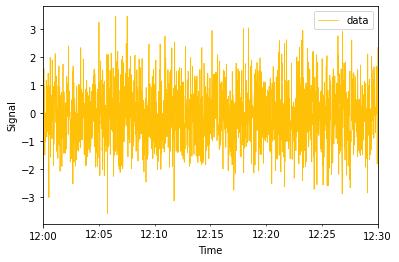

In [1]:
from datetime import timedelta

import pandas as pd
import numpy as np

datetimes = pd.date_range(
    start='2020-01-01 12:00:00',
    end='2020-01-01 12:30:00',
    freq='1s'
)

# Generate toy data
df = pd.DataFrame(
    np.random.randn(len(datetimes)),
    columns=["data"],
    index=datetimes
)
print(df.info())

ax = df.plot(y='data', lw=0.8, c='#FFC107')
ax.set_xlabel('Time')
ax.set_ylabel('Signal')

Use the `pd.DatetimeIndex` to plot only data from June

### Operating with the `pd.DatetimeIndex()`

- Grab a slice of the pandas dataframe `df` that contains the first 5 minutes and 42 seconds of the fake data
- Smooth the dataframe by applying a rolling mean in a 5-second window.
    - Note here we use the a little syntatic sugar called _method chaining_ in `pandas`. All this does is prevent us from having to define variables for each and every step along the way and is particularly well-suited for data exploration.

In [2]:
start_idx = df.index[0]
stop_idx = start_idx + timedelta(minutes=5, seconds=42)
df_slice = df[start_idx: stop_idx]

Text(0, 0.5, 'Signal')

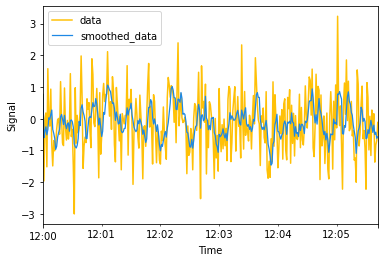

In [3]:
ax = df_slice.plot(y='data', c='#FFC107')
ax = (
    df_slice
    .rolling('5s') 
    .mean()
    .rename(columns={'data':'smoothed_data'})
    .plot(y='smoothed_data',ax=ax, lw=1.25, c='#1E88E5')
)
ax.set_xlabel('Time')
ax.set_ylabel('Signal')

# `matplotlib`

### Matplotlib style sheets

- Matplotlib contains a variety of builtin style sheets that stylize plots based on the parameters defined in the style sheet.


<a href="https://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html">Example output for each style sheet</a>

<a href="https://matplotlib.org/stable/tutorials/introductory/customizing.html">Custom style sheets</a>

In [4]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

Text(0, 0.5, 'Signal')

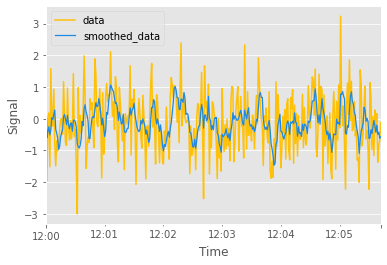

In [5]:
ax = df_slice.plot(y='data', c='#FFC107')
ax = (
    df_slice
    .rolling('5s') 
    .mean()
    .rename(columns={'data':'smoothed_data'})
    .plot(y='smoothed_data',ax=ax, lw=1.25, c='#1E88E5')
)
ax.set_xlabel('Time')
ax.set_ylabel('Signal')